In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
img_size = 448
epochs=300

# Train

In [ ]:
model = YOLO("yolo11n-seg.pt")

results = model.train(
    data="dataset2/data.yaml", 
    epochs=epochs, 
    imgsz=img_size, 
    erasing=0
)

100%|██████████| 5.90M/5.90M [00:00<00:00, 9.60MB/s]


# Inference

In [3]:
model = YOLO("segmentation.pt")

In [24]:
def postprocess_mask(mask, kernel_size=15):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

def infer_segmentation(image_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    result = model(image)[0]
    mask = np.zeros((height, width), dtype=np.uint8)

    if result.masks is not None:
        for mask_array in result.masks.data.cpu().numpy():
            mask_array = cv2.resize(mask_array, (width, height), interpolation=cv2.INTER_LINEAR)
            mask[mask_array > 0] = 255

    mask = postprocess_mask(mask)

    return image, mask

def get_mask_drawn_over_image(img, mask, alpha=0.4):
    h, w = mask.shape
    red_overlay = np.zeros((h, w, 3), dtype=np.uint8)
    red_overlay[:, :, 0] = (mask > 0).astype(np.uint8) * 255

    overlaid_image = cv2.addWeighted(img, 1.0, red_overlay, alpha, 0)

    return overlaid_image


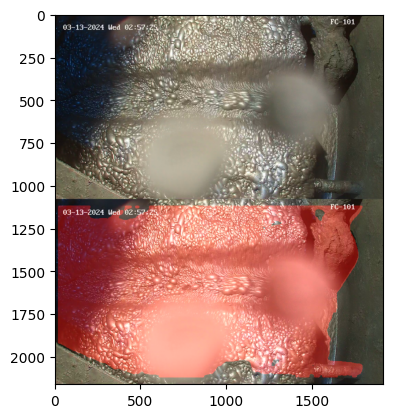

In [25]:
image, mask = infer_segmentation("dataset/images/val/1710266253_0.jpg")
out = get_mask_drawn_over_image(image, mask)

out = np.vstack([image, out])
plt.imshow(out)